# **Data Preprocessing**

In [1]:
import json
import numpy as np
import pandas as pd
import os
import re
import pickle
import nltk
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

In [2]:
User_id = []
Bus_id = []
Star = []
Useful = []
Funny = []
Cool = []
Text = []
I=1

In [3]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ndavidson/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/ndavidson/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/ndavidson/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [4]:
DF_Final = pd.read_csv('./Downloads/Data_Final')

In [5]:
documents = []
X = DF_Final.Review
stemmer = WordNetLemmatizer()
for i in range(0, len(X)):
    # Remove all the special characters, like parathesis
    document = re.sub(r'\W', ' ', str(X[i]))
    # remove all single characters: like a, b, c, d
    document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)
    # Remove single characters from the start
    document = re.sub(r'\^[a-zA-Z]\s+', ' ', document)
    # Substituting multiple spaces with single space
    document = re.sub(r'\s+', ' ', document, flags=re.I)
    # Removing prefixed 'b'
    document = re.sub(r'^b\s+', '', document)
    # Converting to Lowercase
    document = document.lower()
    # Lemmatization
    document = document.split()
    document = [stemmer.lemmatize(word) for word in document]
    document = ' '.join(document)
    documents.append(document)

In [6]:
vectorizer = CountVectorizer(max_features=1500, min_df=0.1, max_df=0.7, 
stop_words=stopwords.words('english'))
X = vectorizer.fit_transform(documents).toarray()

In [7]:
f_n = open("./Downloads/negative-words.txt", "r")
Negative_words = f_n.readlines()
f_p = open("./Downloads/positive-words.txt", "r")
Positive_words = f_p.readlines()
Voca = [i.rstrip('\n') for i in Positive_words] + [i.rstrip('\n') for i in 
Negative_words]
vectorizer = CountVectorizer(vocabulary=np.unique(Voca))
X = vectorizer.fit_transform(documents).toarray()

In [8]:
DF_Final.head()

,Unnamed: 0,User_id,Bus_id,Star,Useful,Cool,Funny,Review,State,City,Bus_Ave_Star,User_Review_count,User_Useful_count,User_Funny_count,User_Cool_count,Elite,User_Fans,Users_Ave_Star
0,0,4hBhtCSgoxkrFgHa4YAD-w,bbEXAEFr4RYHLlZ-HFssTA,5.0,0,0,0,"Great burgers,fries and salad! Burgers have a...",CA,Goleta,4.0,922,1687,694,1070,"2015,2016,2017,2018,2019,20,20,2021",51,4.20
1,1,JYYYKt6TdVA4ng9lLcXt_g,SZU9c8V2GuREDN5KgyHFJw,5.0,0,0,0,We were a bit weary about trying the Shellfish...,CA,Santa Barbara,4.0,338,800,144,353,"2012,2013,2014,2015,2016,2017,2018,2019,20,20,...",30,4.12
2,2,Uk3X2AypU8AqvcYEVf7s6Q,eL4lyE7LNoXEMvpcJ8WNVw,3.0,5,0,0,This was a tough one! On the merits of the w...,CA,Santa Barbara,4.0,431,2126,1245,1476,"2012,2013,2014,2015,2016,2017,2018,2019,20,20,...",76,4.05
3,3,LcqNuhqaYt5ekKzaRirmIg,SZU9c8V2GuREDN5KgyHFJw,5.0,2,1,0,"I love trying fresh seafood on piers, wharfs a...",CA,Santa Barbara,4.0,258,452,125,183,"2015,2016,2017",37,3.99
4,4,gasLVm0KRwrVhPGRcqATjw,CHh0ZFrQcsk4boOItr2Zuw,4.0,1,2,0,I stopped in because I was hungry for some sna...,CA,Carpinteria,3.0,1638,2658,933,2297,"2014,2015,2016,2017,2018,2019,20,20,2021",105,3.79


In [9]:
# Change classification problem from predicting 5 classes to predicting Good (Stars > 3) and Bad (Stars <= 3) ratings
DF_Final['Star'] = (DF_Final['Star']>3).astype(int)

In [10]:
# Check to see if changes applied correctly
DF_Final.head(5)

,Unnamed: 0,User_id,Bus_id,Star,Useful,Cool,Funny,Review,State,City,Bus_Ave_Star,User_Review_count,User_Useful_count,User_Funny_count,User_Cool_count,Elite,User_Fans,Users_Ave_Star
0,0,4hBhtCSgoxkrFgHa4YAD-w,bbEXAEFr4RYHLlZ-HFssTA,1,0,0,0,"Great burgers,fries and salad! Burgers have a...",CA,Goleta,4.0,922,1687,694,1070,"2015,2016,2017,2018,2019,20,20,2021",51,4.20
1,1,JYYYKt6TdVA4ng9lLcXt_g,SZU9c8V2GuREDN5KgyHFJw,1,0,0,0,We were a bit weary about trying the Shellfish...,CA,Santa Barbara,4.0,338,800,144,353,"2012,2013,2014,2015,2016,2017,2018,2019,20,20,...",30,4.12
2,2,Uk3X2AypU8AqvcYEVf7s6Q,eL4lyE7LNoXEMvpcJ8WNVw,0,5,0,0,This was a tough one! On the merits of the w...,CA,Santa Barbara,4.0,431,2126,1245,1476,"2012,2013,2014,2015,2016,2017,2018,2019,20,20,...",76,4.05
3,3,LcqNuhqaYt5ekKzaRirmIg,SZU9c8V2GuREDN5KgyHFJw,1,2,1,0,"I love trying fresh seafood on piers, wharfs a...",CA,Santa Barbara,4.0,258,452,125,183,"2015,2016,2017",37,3.99
4,4,gasLVm0KRwrVhPGRcqATjw,CHh0ZFrQcsk4boOItr2Zuw,1,1,2,0,I stopped in because I was hungry for some sna...,CA,Carpinteria,3.0,1638,2658,933,2297,"2014,2015,2016,2017,2018,2019,20,20,2021",105,3.79


# **Train a Naive Bayes Classifier**

In [11]:
#80-20 split of train test split
Y = DF_Final['Star'] # Variable we are predicting
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8)

# Check dimensions
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)


(43076, 6786)
(10769, 6786)
(43076,)
(10769,)


In [12]:
# Multinomial Naive Bayes Classifier
classifier = MultinomialNB()
classifier.fit(X_train, Y_train)

MultinomialNB()

In [13]:
preds = classifier.predict(X_test)

<Figure size 432x288 with 0 Axes>

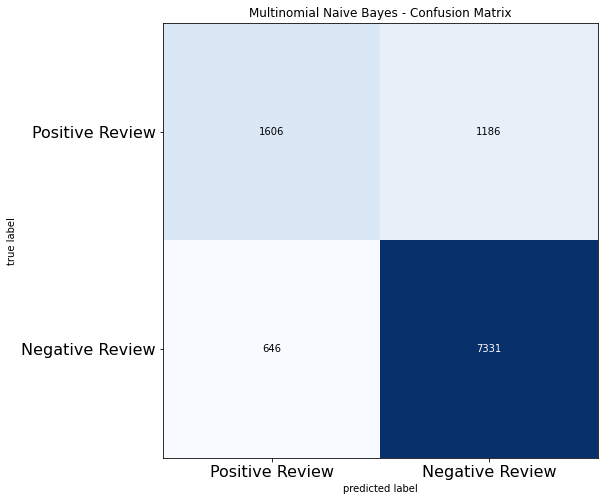



              precision    recall  f1-score   support

           0       0.71      0.58      0.64      2792
           1       0.86      0.92      0.89      7977

    accuracy                           0.83     10769
   macro avg       0.79      0.75      0.76     10769
weighted avg       0.82      0.83      0.82     10769



In [14]:
### With no coefficients
cm = confusion_matrix(Y_test, preds)
plt.figure()
plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Blues)
plt.title("Multinomial Naive Bayes - Confusion Matrix")
plt.xticks(range(2), ["Positive Review","Negative Review"], fontsize=16)
plt.yticks(range(2), ["Positive Review","Negative Review"], fontsize=16)
plt.show()
print('\n')
print(classification_report(Y_test, preds))

In [15]:
# We may want to scale our feature vectors by a weighted average of the restuarant's and user's average stars
Users_Avg_Star = DF_Final['Users_Ave_Star']
Bus_Avg_Star = DF_Final['Bus_Ave_Star']
scaler1 = Users_Avg_Star / 5
scaler2 = Bus_Avg_Star / 5
scaled_X = []
for i in range(len(X)):
    scaled_X.append(X[i] * ((scaler1[i] + scaler2[i]) / 2)) 

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(scaled_X, Y, train_size=0.8)

In [17]:
classifier = MultinomialNB()
classifier.fit(X_train, Y_train)

MultinomialNB()

In [18]:
preds = classifier.predict(X_test)

<Figure size 432x288 with 0 Axes>

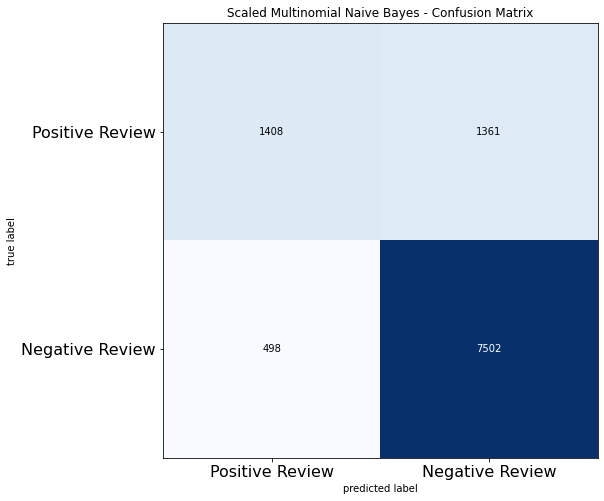



              precision    recall  f1-score   support

           0       0.74      0.51      0.60      2769
           1       0.85      0.94      0.89      8000

    accuracy                           0.83     10769
   macro avg       0.79      0.72      0.75     10769
weighted avg       0.82      0.83      0.82     10769



In [19]:
### With both coefficients
cm = confusion_matrix(Y_test, preds)
plt.figure()
plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Blues)
plt.title("Scaled Multinomial Naive Bayes - Confusion Matrix")
plt.xticks(range(2), ["Positive Review","Negative Review"], fontsize=16)
plt.yticks(range(2), ["Positive Review","Negative Review"], fontsize=16)
plt.show()
print('\n')
print(classification_report(Y_test, preds))

# Logistic Regression

In [20]:
logisticRegr = LogisticRegression(max_iter=1000)

In [21]:
# Use the unscaled X as it perfromed better
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8)

In [22]:
logisticRegr.fit(X_train, Y_train)

LogisticRegression(max_iter=1000)

In [23]:
predictions = logisticRegr.predict(X_test)

<Figure size 432x288 with 0 Axes>

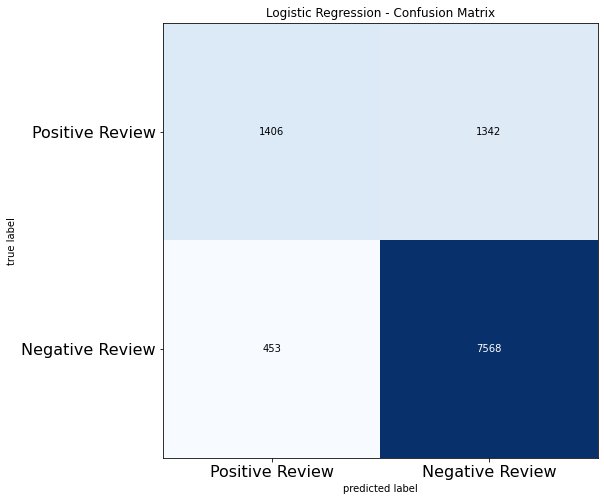



              precision    recall  f1-score   support

           0       0.76      0.51      0.61      2748
           1       0.85      0.94      0.89      8021

    accuracy                           0.83     10769
   macro avg       0.80      0.73      0.75     10769
weighted avg       0.83      0.83      0.82     10769



In [24]:
cm = confusion_matrix(Y_test, predictions)
plt.figure()
plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Blues)
plt.title("Logistic Regression - Confusion Matrix")
plt.xticks(range(2), ["Positive Review","Negative Review"], fontsize=16)
plt.yticks(range(2), ["Positive Review","Negative Review"], fontsize=16)
plt.show()
print('\n')
print(classification_report(Y_test, predictions))

In [25]:
# Try with scaled coefficients
logisticRegr2 = LogisticRegression(max_iter=1000)

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(scaled_X, Y, train_size=0.8)

In [27]:
logisticRegr2.fit(X_train, Y_train)

LogisticRegression(max_iter=1000)

In [28]:
predictions2 = logisticRegr.predict(X_test)

<Figure size 432x288 with 0 Axes>

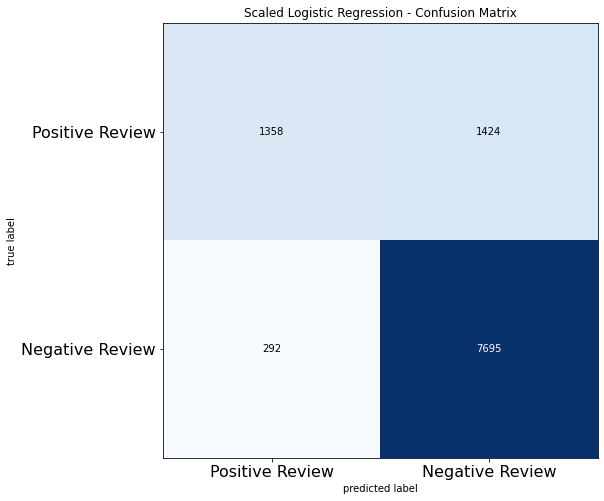



              precision    recall  f1-score   support

           0       0.82      0.49      0.61      2782
           1       0.84      0.96      0.90      7987

    accuracy                           0.84     10769
   macro avg       0.83      0.73      0.76     10769
weighted avg       0.84      0.84      0.83     10769



In [29]:
cm = confusion_matrix(Y_test, predictions2)
plt.figure()
plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Blues)
plt.title("Scaled Logistic Regression - Confusion Matrix")
plt.xticks(range(2), ["Positive Review","Negative Review"], fontsize=16)
plt.yticks(range(2), ["Positive Review","Negative Review"], fontsize=16)
plt.show()
print('\n')
print(classification_report(Y_test, predictions2))

# Support Vector Machines (SVM)

# If a review is useful

In [30]:
DF_Final['User_Useful_count'].describe()

count     53845.000000
mean       2278.217866
std        6293.197684
min          14.000000
25%         276.000000
50%         582.000000
75%        1795.000000
max      206296.000000
Name: User_Useful_count, dtype: float64

In [31]:
DF_Final['Useful'].describe()

count    53845.000000
mean         2.923094
std          7.773329
min          0.000000
25%          0.000000
50%          1.000000
75%          3.000000
max        207.000000
Name: Useful, dtype: float64

In [32]:
vectorizer = CountVectorizer(max_features=1500, min_df=0.1, max_df=0.7, 
stop_words=stopwords.words('english'))
features = vectorizer.fit_transform(documents).toarray()

In [33]:
# Changes usefullness into a binary classification problem where {1 : Useful, 0 : Unuseful} 
# We choose 3 to be our cutoff as it is the mean value for usefullness
# Values that exceed 3 are considered to be above average useful reviews

DF_Final['Useful'] = (DF_Final['Useful']>3).astype(int)
# Check if it worked
DF_Final.head()

,Unnamed: 0,User_id,Bus_id,Star,Useful,Cool,Funny,Review,State,City,Bus_Ave_Star,User_Review_count,User_Useful_count,User_Funny_count,User_Cool_count,Elite,User_Fans,Users_Ave_Star
0,0,4hBhtCSgoxkrFgHa4YAD-w,bbEXAEFr4RYHLlZ-HFssTA,1,0,0,0,"Great burgers,fries and salad! Burgers have a...",CA,Goleta,4.0,922,1687,694,1070,"2015,2016,2017,2018,2019,20,20,2021",51,4.20
1,1,JYYYKt6TdVA4ng9lLcXt_g,SZU9c8V2GuREDN5KgyHFJw,1,0,0,0,We were a bit weary about trying the Shellfish...,CA,Santa Barbara,4.0,338,800,144,353,"2012,2013,2014,2015,2016,2017,2018,2019,20,20,...",30,4.12
2,2,Uk3X2AypU8AqvcYEVf7s6Q,eL4lyE7LNoXEMvpcJ8WNVw,0,1,0,0,This was a tough one! On the merits of the w...,CA,Santa Barbara,4.0,431,2126,1245,1476,"2012,2013,2014,2015,2016,2017,2018,2019,20,20,...",76,4.05
3,3,LcqNuhqaYt5ekKzaRirmIg,SZU9c8V2GuREDN5KgyHFJw,1,0,1,0,"I love trying fresh seafood on piers, wharfs a...",CA,Santa Barbara,4.0,258,452,125,183,"2015,2016,2017",37,3.99
4,4,gasLVm0KRwrVhPGRcqATjw,CHh0ZFrQcsk4boOItr2Zuw,1,0,2,0,I stopped in because I was hungry for some sna...,CA,Carpinteria,3.0,1638,2658,933,2297,"2014,2015,2016,2017,2018,2019,20,20,2021",105,3.79


In [34]:
Y_useful = DF_Final['Useful']
useful = features

In [35]:
useful_train, useful_test, Y_useful_train, Y_useful_test = train_test_split(useful, Y_useful, train_size=0.8)

In [36]:
use_classifier = MultinomialNB()
use_classifier.fit(useful_train, Y_useful_train)

MultinomialNB()

In [37]:
use_preds = use_classifier.predict(useful_test)

# We want to minimize the amount of False Negative
## This is because we would rather have 

<Figure size 432x288 with 0 Axes>

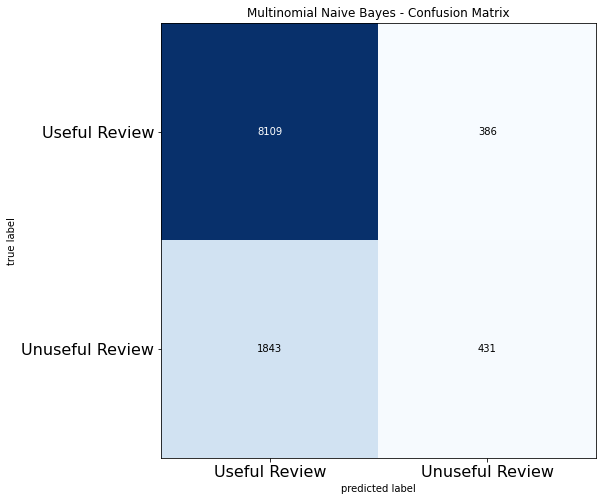



              precision    recall  f1-score   support

           0       0.81      0.95      0.88      8495
           1       0.53      0.19      0.28      2274

    accuracy                           0.79     10769
   macro avg       0.67      0.57      0.58     10769
weighted avg       0.75      0.79      0.75     10769



In [38]:
cm = confusion_matrix(Y_useful_test, use_preds)
plt.figure()
plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Blues)
plt.title("Multinomial Naive Bayes - Confusion Matrix")
plt.xticks(range(2), ["Useful Review","Unuseful Review"], fontsize=16)
plt.yticks(range(2), ["Useful Review","Unuseful Review"], fontsize=16)
plt.show()
print('\n')
print(classification_report(Y_useful_test, use_preds))